In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pkl
import json

from google.colab import drive
user_name = '/content/drive'
drive.mount(user_name, force_remount=True)


Mounted at /content/drive


## 1. Helper Functions

In [2]:
def moving_average(a, n=1,diff=False):
    if diff==True:
      for i in range(len(a)):
        a[i] = np.mean(a[i].cpu().numpy(),0)
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
def clean_sac(input,sac_issue=False):
  new_list = []
  if sac_issue == True:
    for i in range(len(input)):
      if input[i]<input[i-1] and (input[i-1]-input[i]>2):
        new_list.append(input[i-1])
  else:
    new_list = input

  return new_list


## 2. ResNet 18

### 2.1 Validation Loss

******************************
DATASET: mnist
CE- Score: 2.7677087783813477
DV- Score: 0.693853110074997
JSD- Score: 0.3405129313468933
NCE- Score: 1.2119486331939697
RKL- Score: 0.5233064293861389
******************************
DATASET: fashionmnist
CE- Score: 2.694205641746521
DV- Score: 0.6938658058643341
JSD- Score: 0.3636557012796402
NCE- Score: 1.2293080687522888
RKL- Score: 0.5446963310241699
******************************
DATASET: emnist
CE- Score: 3.134352207183838
DV- Score: 0.6938554644584656
JSD- Score: 0.3003377914428711
NCE- Score: 1.1286532878875732
RKL- Score: 0.46071936190128326
******************************
DATASET: cifar10
CE- Score: 2.9530081748962402
DV- Score: 0.6938620507717133
JSD- Score: 0.38670098781585693
NCE- Score: 1.2618393301963806
RKL- Score: 0.543383002281189
******************************
DATASET: cifar100
CE- Score: 2.9855191707611084
DV- Score: 0.6938530504703522
JSD- Score: 0.3672514408826828
NCE- Score: 1.1721991300582886
RKL- Score: 0.55817401409

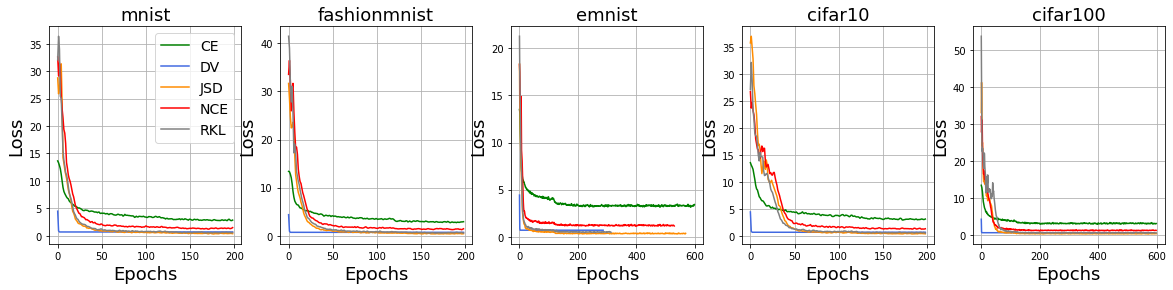

In [15]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'val_loss'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",min(avg_ce))
    print("DV- Score:",min(avg_dv))
    print("JSD- Score:",min(avg_jsd))
    print("NCE- Score:",min(avg_nce))
    print("RKL- Score:",min(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'val_loss.png', dpi=600)



### 2.2 Training Loss

******************************
DATASET: mnist
CE- Score: 2.7974406120936237
DV- Score: 0.693853172874455
JSD- Score: 0.4301141861120641
NCE- Score: 1.3449926347732912
RKL- Score: 0.5842128179709221
******************************
DATASET: fashionmnist
CE- Score: 2.8050796668370594
DV- Score: 0.6938658422946986
JSD- Score: 0.42778939860662035
NCE- Score: 1.3406666564623606
RKL- Score: 0.6078741521676534
******************************
DATASET: emnist
CE- Score: 3.286573915603867
DV- Score: 0.6938554644584656
JSD- Score: 0.34266253074009967
NCE- Score: 1.2003005382953802
RKL- Score: 0.4989335579291492
******************************
DATASET: cifar10
CE- Score: 3.0581466315841794
DV- Score: 0.6938621678447703
JSD- Score: 0.43541758107187434
NCE- Score: 1.3356323817824887
RKL- Score: 0.6015869281101232
******************************
DATASET: cifar100
CE- Score: 3.15572386173244
DV- Score: 0.6938532172107728
JSD- Score: 0.4265698392677564
NCE- Score: 1.3060036786079081
RKL- Score: 0.6444770396

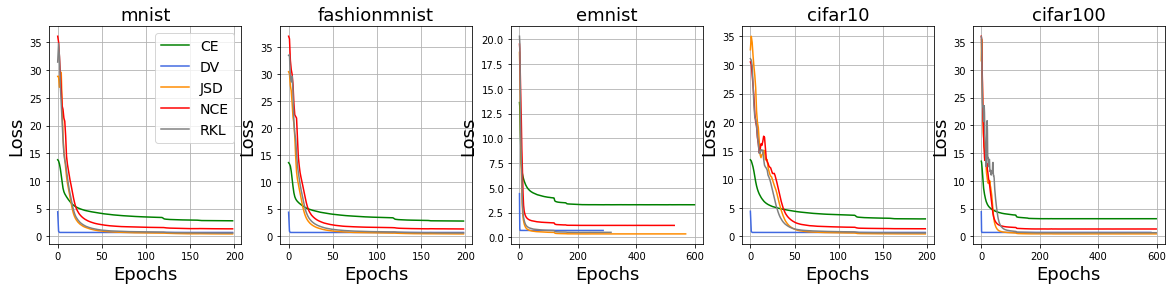

In [16]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'avg_loss'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",min(avg_ce))
    print("DV- Score:",min(avg_dv))
    print("JSD- Score:",min(avg_jsd))
    print("NCE- Score:",min(avg_nce))
    print("RKL- Score:",min(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'avg_loss.png', dpi=600)



### 2.3 Top-1 Accuracy

******************************
DATASET: mnist
CE- Score: 0.9555500000000023
DV- Score: 0.3215999999999992
JSD- Score: 0.920499999999997
NCE- Score: 0.9234499999999954
RKL- Score: 0.9085999999999999
******************************
DATASET: fashionmnist
CE- Score: 0.9513000000000034
DV- Score: 0.2944
JSD- Score: 0.9240999999999993
NCE- Score: 0.9224499999999978
RKL- Score: 0.9225500000000011
******************************
DATASET: emnist
CE- Score: 0.8102644230769229
DV- Score: 0.31574519230769305
JSD- Score: 0.8040624999999997
NCE- Score: 0.8112980769230784
RKL- Score: 0.8065144230769237
******************************
DATASET: cifar10
CE- Score: 0.8057000000000016
DV- Score: 0.31285000000000096
JSD- Score: 0.7117999999999967
NCE- Score: 0.7008999999999972
RKL- Score: 0.7135999999999996
******************************
DATASET: cifar100
CE- Score: 0.5202000000000027
DV- Score: 0.10069999999999979
JSD- Score: 0.4059999999999988
NCE- Score: 0.4124000000000052
RKL- Score: 0.39284999999999926


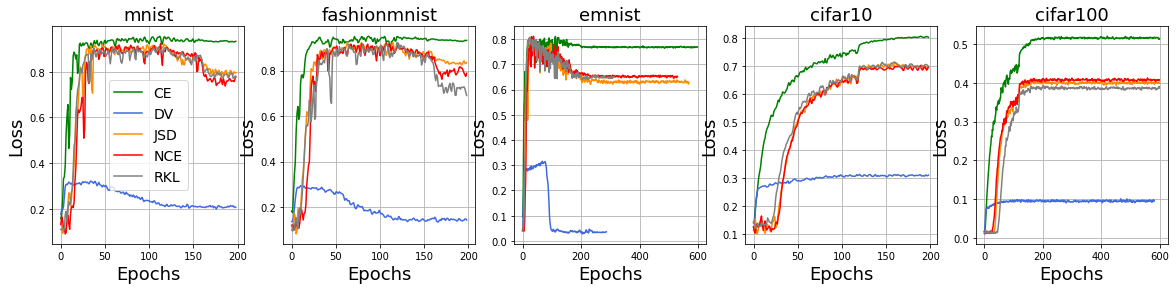

In [17]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'top1_acc'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",max(avg_ce))
    print("DV- Score:",max(avg_dv))
    print("JSD- Score:",max(avg_jsd))
    print("NCE- Score:",max(avg_nce))
    print("RKL- Score:",max(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'top1_acc.png', dpi=600)



### 2.4 Top-5 Accuracy

******************************
DATASET: mnist
CE- Score: 0.9989000000000061
DV- Score: 0.7754000000000003
JSD- Score: 0.9980499999999992
NCE- Score: 0.9972500000000011
RKL- Score: 0.9972999999999992
******************************
DATASET: fashionmnist
CE- Score: 0.9991000000000057
DV- Score: 0.81935
JSD- Score: 0.9975499999999968
NCE- Score: 0.9982000000000042
RKL- Score: 0.9977499999999964
******************************
DATASET: emnist
CE- Score: 0.9808894230769241
DV- Score: 0.6834615384615397
JSD- Score: 0.9790384615384617
NCE- Score: 0.9803125000000001
RKL- Score: 0.978004807692308
******************************
DATASET: cifar10
CE- Score: 0.9888499999999993
DV- Score: 0.8141999999999996
JSD- Score: 0.962299999999999
NCE- Score: 0.9551499999999962
RKL- Score: 0.9619999999999962
******************************
DATASET: cifar100
CE- Score: 0.7820000000000107
DV- Score: 0.2740999999999971
JSD- Score: 0.6338000000000008
NCE- Score: 0.6433000000000035
RKL- Score: 0.6200999999999972


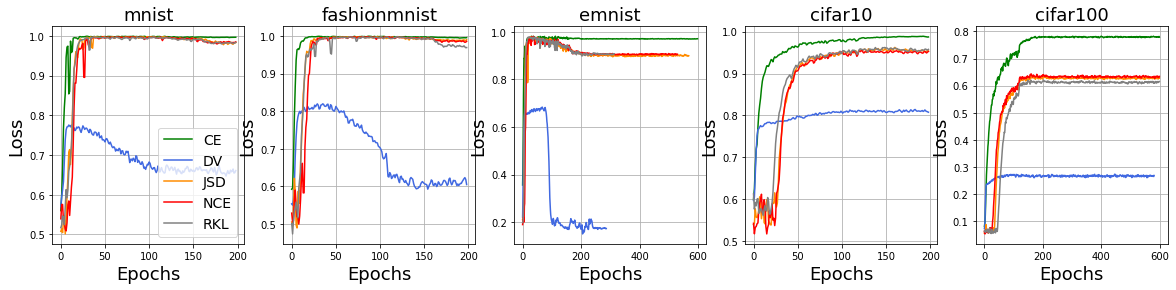

In [18]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'top5_acc'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",max(avg_ce))
    print("DV- Score:",max(avg_dv))
    print("JSD- Score:",max(avg_jsd))
    print("NCE- Score:",max(avg_nce))
    print("RKL- Score:",max(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'top5_acc.png', dpi=600)



### 2.5 Best Accuracy

******************************
DATASET: mnist
CE- Score: 0.9612000000000052
DV- Score: 0.325800000000001
JSD- Score: 0.924900000000008
NCE- Score: 0.9314000000000036
RKL- Score: 0.9273000000000025
******************************
DATASET: fashionmnist
CE- Score: 0.9610000000000127
DV- Score: 0.29720000000000013
JSD- Score: 0.9327000000000112
NCE- Score: 0.9296999999999969
RKL- Score: 0.9269000000000034
******************************
DATASET: emnist
CE- Score: 0.832307692307694
DV- Score: 0.3165865384615394
JSD- Score: 0.8148076923076957
NCE- Score: 0.8169230769231035
RKL- Score: 0.8120192307692378
******************************
DATASET: cifar10
CE- Score: 0.8057000000000016
DV- Score: 0.3160999999999987
JSD- Score: 0.7129999999999939
NCE- Score: 0.703000000000003
RKL- Score: 0.7175000000000011
******************************
DATASET: cifar100
CE- Score: 0.5209000000000117
DV- Score: 0.10150000000000148
JSD- Score: 0.40620000000001255
NCE- Score: 0.4140000000000015
RKL- Score: 0.3945000000

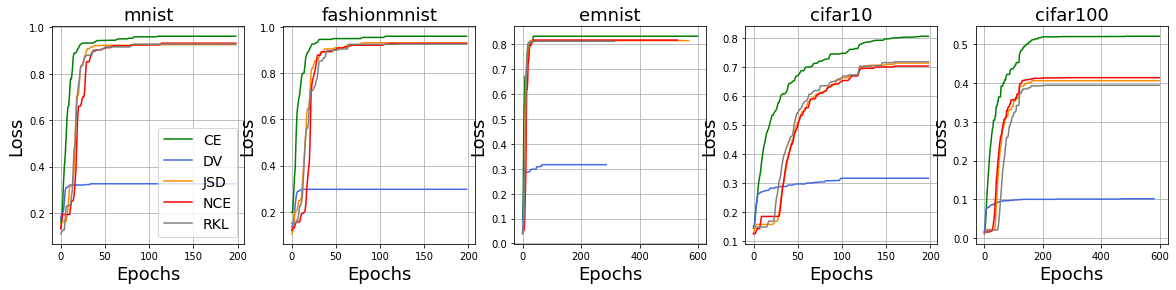

In [19]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet18/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'best_acc'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",max(avg_ce))
    print("DV- Score:",max(avg_dv))
    print("JSD- Score:",max(avg_jsd))
    print("NCE- Score:",max(avg_nce))
    print("RKL- Score:",max(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'best_acc.png', dpi=600)



## 3. ResNet-34

### 3.1 Validation Loss

******************************
DATASET: mnist
CE- Score: 2.5113251209259033
DV- Score: 0.6938590407371521
JSD- Score: 0.3455881178379059
NCE- Score: 1.2307918071746826
RKL- Score: 0.4981146901845932
******************************
DATASET: fashionmnist
CE- Score: 2.5737403631210327
DV- Score: 0.6938560009002686
JSD- Score: 0.35237787663936615
NCE- Score: 1.1633852124214172
RKL- Score: 0.4941030591726303
******************************
DATASET: emnist
CE- Score: 3.0760140419006348
DV- Score: 0.6938652396202087
JSD- Score: 0.2924036681652069
NCE- Score: 1.0883449912071228
RKL- Score: 0.43358828127384186
******************************
DATASET: cifar10
CE- Score: 2.79446280002594
DV- Score: 0.6938691437244415
JSD- Score: 0.3609939217567444
NCE- Score: 1.2381647229194641
RKL- Score: 0.4854247123003006
******************************
DATASET: cifar100
CE- Score: 2.915603518486023
DV- Score: 0.6938571333885193
JSD- Score: 0.4004521071910858
NCE- Score: 1.23953115940094
RKL- Score: 0.490186676383

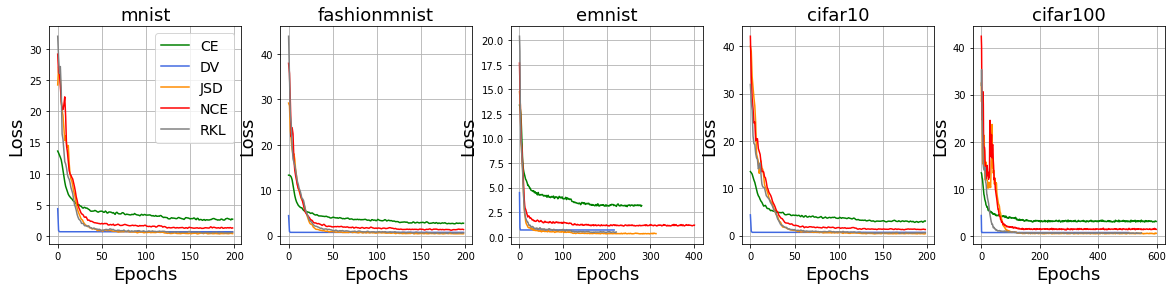

In [20]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'val_loss'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",min(avg_ce))
    print("DV- Score:",min(avg_dv))
    print("JSD- Score:",min(avg_jsd))
    print("NCE- Score:",min(avg_nce))
    print("RKL- Score:",min(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'val_loss.png', dpi=600)



### 3.2 Average Loss

******************************
DATASET: mnist
CE- Score: 2.6367424214045627
DV- Score: 0.6938590692997053
JSD- Score: 0.40082406299114837
NCE- Score: 1.2803913128534532
RKL- Score: 0.5635750752290107
******************************
DATASET: fashionmnist
CE- Score: 2.670551173528054
DV- Score: 0.6938560919602708
JSD- Score: 0.39691948012512057
NCE- Score: 1.3012589546839308
RKL- Score: 0.5836689112663578
******************************
DATASET: emnist
CE- Score: 3.169311819443351
DV- Score: 0.6938652396202087
JSD- Score: 0.3272522132366049
NCE- Score: 1.1604731291990902
RKL- Score: 0.4821375110516044
******************************
DATASET: cifar10
CE- Score: 2.923198890190122
DV- Score: 0.693869266881947
JSD- Score: 0.4010966199588779
NCE- Score: 1.3208726939010376
RKL- Score: 0.5549687173652842
******************************
DATASET: cifar100
CE- Score: 3.051892325820859
DV- Score: 0.6938573229026872
JSD- Score: 0.48187830446715907
NCE- Score: 1.3917202960967643
RKL- Score: 0.56897140606

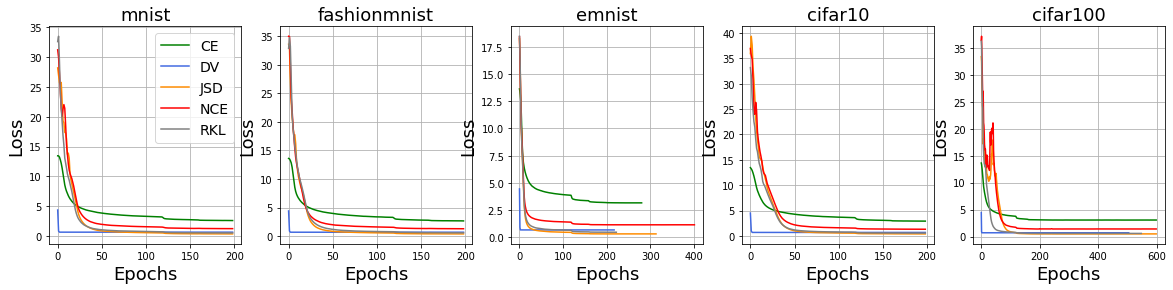

In [21]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'avg_loss'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",min(avg_ce))
    print("DV- Score:",min(avg_dv))
    print("JSD- Score:",min(avg_jsd))
    print("NCE- Score:",min(avg_nce))
    print("RKL- Score:",min(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'avg_loss.png', dpi=600)



### 2.3 Top-1 Accuracy

******************************
DATASET: mnist
CE- Score: 0.9659499999999994
DV- Score: 0.24404999999999966
JSD- Score: 0.9281999999999968
NCE- Score: 0.931049999999999
RKL- Score: 0.9296500000000023
******************************
DATASET: fashionmnist
CE- Score: 0.9637499999999974
DV- Score: 0.28959999999999986
JSD- Score: 0.9332999999999991
NCE- Score: 0.9307500000000033
RKL- Score: 0.9346500000000049
******************************
DATASET: emnist
CE- Score: 0.8342788461538433
DV- Score: 0.1697115384615384
JSD- Score: 0.8065865384615378
NCE- Score: 0.8316105769230768
RKL- Score: 0.8310096153846143
******************************
DATASET: cifar10
CE- Score: 0.8181000000000012
DV- Score: 0.2723999999999993
JSD- Score: 0.7164999999999964
NCE- Score: 0.7186999999999983
RKL- Score: 0.7242000000000033
******************************
DATASET: cifar100
CE- Score: 0.5245499999999907
DV- Score: 0.07419999999999938
JSD- Score: 0.37915000000000276
NCE- Score: 0.39750000000000085
RKL- Score: 0.42040

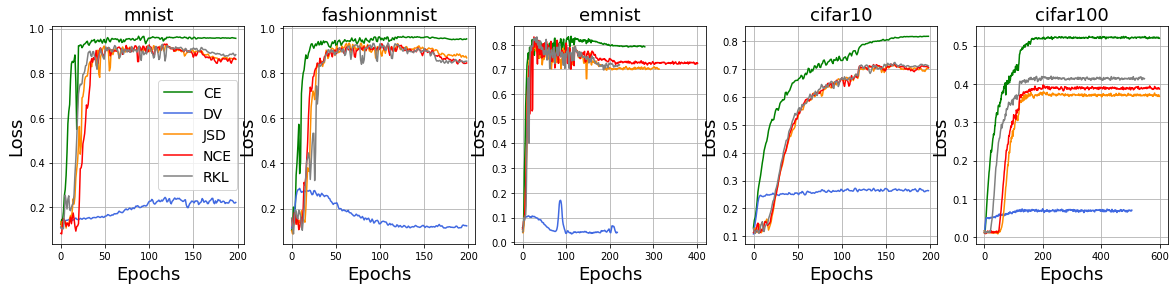

In [22]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'top1_acc'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",max(avg_ce))
    print("DV- Score:",max(avg_dv))
    print("JSD- Score:",max(avg_jsd))
    print("NCE- Score:",max(avg_nce))
    print("RKL- Score:",max(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'top1_acc.png', dpi=600)



### 2.4 Top-5 Accuracy

******************************
DATASET: mnist
CE- Score: 0.9996000000000009
DV- Score: 0.6996000000000038
JSD- Score: 0.9984499999999983
NCE- Score: 0.9984500000000054
RKL- Score: 0.9978499999999997
******************************
DATASET: fashionmnist
CE- Score: 0.9994499999999995
DV- Score: 0.7941500000000001
JSD- Score: 0.9986000000000033
NCE- Score: 0.9981499999999954
RKL- Score: 0.9983000000000004
******************************
DATASET: emnist
CE- Score: 0.9861538461538473
DV- Score: 0.4869230769230768
JSD- Score: 0.9794711538461538
NCE- Score: 0.9839903846153835
RKL- Score: 0.9857451923076912
******************************
DATASET: cifar10
CE- Score: 0.9898000000000025
DV- Score: 0.7781499999999966
JSD- Score: 0.9662500000000023
NCE- Score: 0.9632500000000022
RKL- Score: 0.9608000000000061
******************************
DATASET: cifar100
CE- Score: 0.7912499999999909
DV- Score: 0.2281499999999994
JSD- Score: 0.6084499999999977
NCE- Score: 0.618549999999999
RKL- Score: 0.6453999999

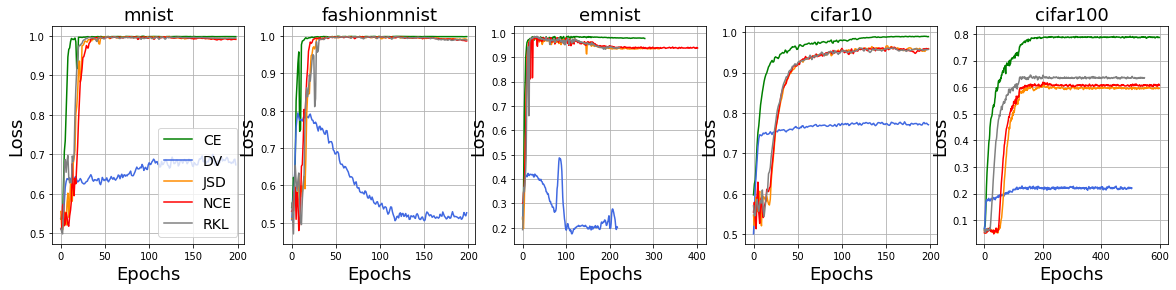

In [23]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'top5_acc'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",max(avg_ce))
    print("DV- Score:",max(avg_dv))
    print("JSD- Score:",max(avg_jsd))
    print("NCE- Score:",max(avg_nce))
    print("RKL- Score:",max(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'top5_acc.png', dpi=600)



### 2.5 Best Accuracy

******************************
DATASET: mnist
CE- Score: 0.9695000000000107
DV- Score: 0.2505999999999986
JSD- Score: 0.9333000000000027
NCE- Score: 0.941599999999994
RKL- Score: 0.9414000000000016
******************************
DATASET: fashionmnist
CE- Score: 0.9703000000000088
DV- Score: 0.28990000000000293
JSD- Score: 0.9409000000000027
NCE- Score: 0.9320000000000022
RKL- Score: 0.936000000000007
******************************
DATASET: emnist
CE- Score: 0.8433173076923026
DV- Score: 0.17144230769230795
JSD- Score: 0.8152884615384721
NCE- Score: 0.8316346153846155
RKL- Score: 0.8437019230769351
******************************
DATASET: cifar10
CE- Score: 0.8186000000000035
DV- Score: 0.27310000000000123
JSD- Score: 0.718599999999995
NCE- Score: 0.7232999999999947
RKL- Score: 0.7286000000000001
******************************
DATASET: cifar100
CE- Score: 0.5255000000000223
DV- Score: 0.07659999999999911
JSD- Score: 0.38120000000000687
NCE- Score: 0.400100000000009
RKL- Score: 0.42430000

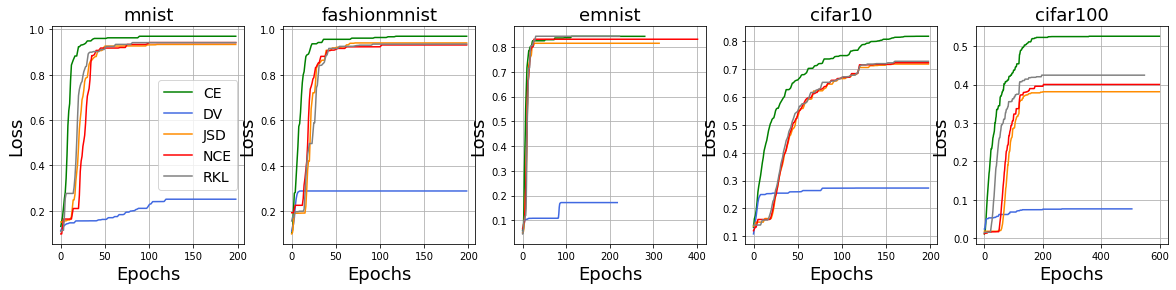

In [24]:
ce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/ce/'
dv_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/DV/'
jsd_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/JSD/'
nce_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/nce/'
rkl_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/RKL/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/StatsProject/resnet34/'

env_list = ['mnist', 'fashionmnist', 'emnist','cifar10','cifar100']

sns.set_style( {'axes.grid' : True}) #'dark',
alpha = 0.2
avg = 2
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.3)
diff = False

mes = 'best_acc'

count = 1
for env_name in env_list:

    avg_ce = moving_average(pkl.load(open(ce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_dv = moving_average(pkl.load(open(dv_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_jsd = moving_average(pkl.load(open(jsd_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_nce = moving_average(pkl.load(open(nce_name+env_name+'/log.pkl','rb'))[mes],avg)
    avg_rkl = moving_average(pkl.load(open(rkl_name+env_name+'/log.pkl','rb'))[mes],avg)
    
    print("*"*30)
    print("DATASET:", env_name)
    print("CE- Score:",max(avg_ce))
    print("DV- Score:",max(avg_dv))
    print("JSD- Score:",max(avg_jsd))
    print("NCE- Score:",max(avg_nce))
    print("RKL- Score:",max(avg_rkl))
    
    plt.subplot(1,5,count)
    plt.title(env_name, fontsize=18)
    plt.plot(np.arange(0,len(avg_ce),1),avg_ce, color='green')
    plt.plot(np.arange(0,len(avg_dv),1),avg_dv, color='royalblue')
    plt.plot(np.arange(0,len(avg_jsd),1),avg_jsd, color='darkorange')
    plt.plot(np.arange(0,len(avg_nce),1),avg_nce, color='red')
    plt.plot(np.arange(0,len(avg_rkl),1),avg_rkl, color='gray')
    # plt.xticks(np.arange(0,len(avg_qmix)+20,50),np.arange(0,2.5,0.5))
    # plt.xticks([0,50,100,150,200-5],[0,0.5,1,1.5,2])
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    if env_name == 'mnist':
      plt.legend(['CE','DV', 'JSD', 'NCE', 'RKL'], fontsize=14)
    count += 1

plt.savefig(checkpoint_name+'best_acc.png', dpi=600)

